# Day1-4 Pandas

## ①Pandasとは
https://pandas.pydata.org/
- Numpyをベースとしたデータ分析を支援するPythonライブラリ
- SeriesやDataframeを使うことで2次元配列（表データ）が扱いやすくなる  


【参考】https://utokyo-ipp.github.io/7/7-1.html

## ②インストール
- この講義では1.4.2を使います

In [2]:
!pip install pandas==1.4.2

## ③Series
- インデックス付きの１次元配列
- ndarrayや辞書型から作成できます

In [4]:
import pandas as pd
import numpy as np

s = pd.Series([0,1,2])
s

0    0
1    1
2    2
dtype: int64

In [6]:
# ndarrayから
a = np.array([0,1,2,3])
s = pd.Series(a)
s

0    0
1    1
2    2
3    3
dtype: int32

In [7]:
# 辞書型から
b = {"key1": 1, "key2": 2, "key3":3}
s = pd.Series(b)
s

key1    1
key2    2
key3    3
dtype: int64

## ④Dataframe
- ２次元配列の表データ
- index（行名）やcolumns（列名）を指定できます
- Seriesと同じくndarrayや辞書型から変換できます
- CSVやExcelを読み込むこともできます

In [8]:
d1 = pd.DataFrame([[0,1,2],[3,4,5],[6,7,8],[9,10,11]], index=[10,11,12,13], columns=['c1','c2','c3'])
d1

,c1,c2,c3
10,0,1,2
11,3,4,5
12,6,7,8
13,9,10,11


In [34]:
# 辞書型から
a = {"name": ["Bob", "Sam", "Will"], "age": [12, 18, 23], "location": ["Tokyo", "Saitama", "Kanagawa"]}
df = pd.DataFrame(a)
df

,name,age,location
0,Bob,12,Tokyo
1,Sam,18,Saitama
2,Will,23,Kanagawa


In [13]:
# CSVファイルから
file = "./data/iris.csv"
iris = pd.read_csv(file)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## ⑤データの参照
### 列名を指定してSerisを取り出す

In [14]:
# 列名を指定してSeriesを取得
iris["sepal.length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

In [18]:
# 複数行を取り出すこともできます
iris[["sepal.length", "sepal.width"]]

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [15]:
# Seriesはndarrayと同様に統計量の計算ができます
iris["sepal.length"].mean()

5.843333333333334

### .head()で先頭の数行を取り出す（デフォルトは5）

In [17]:
iris.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


### 行数を指定して取り出す

In [21]:
iris[2:8]

,sepal.length,sepal.width,petal.length,petal.width,variety
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa


### .ilocを使って行・列を指定して値を取り出す

In [22]:
# 2行目2列目の値
iris.iloc[2,2]

1.3

In [24]:
# 範囲を指定して取り出すこともできます
iris.iloc[3:8, 2:4]

,petal.length,petal.width
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2


### locを使って行名や列名を指定して取り出す

In [28]:
# ilocのindexと一致しないことに注意
iris.loc[3:8, ["petal.length", "petal.width"]]

,petal.length,petal.width
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2


## ⑥条件を指定してデータを取り出す
- 条件をしていすることで条件にあったデータだけを取り出すことができます

In [30]:
iris[iris["sepal.length"]>5.0]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
10,5.4,3.7,1.5,0.2,Setosa
14,5.8,4.0,1.2,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [33]:
# 複数条件はand->"&",or->"|",not->"~"を使います
iris[(iris["sepal.length"]>5.0)&(iris["variety"]=="Setosa")]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
10,5.4,3.7,1.5,0.2,Setosa
14,5.8,4.0,1.2,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa
16,5.4,3.9,1.3,0.4,Setosa
17,5.1,3.5,1.4,0.3,Setosa
18,5.7,3.8,1.7,0.3,Setosa
19,5.1,3.8,1.5,0.3,Setosa
20,5.4,3.4,1.7,0.2,Setosa


## ⑦列の追加・削除

In [45]:
a = {"name": ["Bob", "Sam", "Will"], "age": [12, 18, 23], "location": ["Tokyo", "Saitama", "Kanagawa"]}
df = pd.DataFrame(a)
df

,name,age,location
0,Bob,12,Tokyo
1,Sam,18,Saitama
2,Will,23,Kanagawa


In [46]:
# 列の追加
df["height"] = [170, 175, 180]
df

,name,age,location,height
0,Bob,12,Tokyo,170
1,Sam,18,Saitama,175
2,Will,23,Kanagawa,180


In [49]:
# 列の削除
df =df.drop("location", axis=1)
df

,name,age,height
0,Bob,12,170
1,Sam,18,175
2,Will,23,180


## ⑧列の追加削除

In [55]:
a = {"name": ["Bob", "Sam", "Will"], "age": [12, 18, 23], "location": ["Tokyo", "Saitama", "Kanagawa"]}
df = pd.DataFrame(a)
df

,name,age,location
0,Bob,12,Tokyo
1,Sam,18,Saitama
2,Will,23,Kanagawa


In [65]:
# 追加する新しいDataFrameをつくります
new_data = pd.DataFrame([["Tom", 20, "Chiba"]], columns = df.columns)
# concatでDataFrame同士を結合します
    # axisで結合方向の指定
    # ignore_indexでindexを無視して結合します
pd.concat([df,new_data], axis=0, ignore_index=True)

,name,age,location
0,Bob,12,Tokyo
1,Sam,18,Saitama
2,Will,23,Kanagawa
3,Tom,20,Chiba


## ⑨indexを後から変更する

In [74]:
a = {"id": ["001","002","003"],"name": ["Bob", "Sam", "Will"], "age": [12, 18, 23], "location": ["Tokyo", "Saitama", "Kanagawa"]}
df = pd.DataFrame(a)
df = df.set_index("id")
df

,name,age,location
id,,,
001,Bob,12,Tokyo
002,Sam,18,Saitama
003,Will,23,Kanagawa


In [75]:
# indexをリセットする
df.reset_index()

,id,name,age,location
0,001,Bob,12,Tokyo
1,002,Sam,18,Saitama
2,003,Will,23,Kanagawa


## ⑩データの統計
- .describe()でデータの数値に関するサマリーが見られます

In [66]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## ⑪グラフを作成する
- matplotlibの簡易的な機能がDataFrameから直接使えます

<AxesSubplot:xlabel='sepal.width', ylabel='petal.width'>

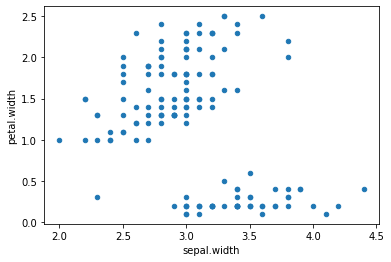

In [78]:
iris.plot.scatter(x="sepal.width", y="petal.width")